# Bicicleterias de Buenos Aires

## Configuración del entorno

In [8]:
# Librerias
import pandas as pd
from shapely import wkt
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Cargando el dataset
file_path = 'Data/bicicleterias-de-la-ciudad (1).csv'
df = pd.read_csv(file_path)

df.head()

,WKT,id,nombre,direccion,telefono,email,web,mecanica_s,horario_de,calle,altura,calle2,direccion_,barrio,comuna
0,POINT (-58.4256879365174 -34.5923050897605),1,Bicicletas Araoz,Araoz 1458,011-4833-7887 / 011-4832-7704,info@biciccletasaraoz.com.ar,http://www.bicicletasaraoz.com.ar/,True,Lunes a Viernes de 10 a 20 hs y Sábados de 10 ...,ARAOZ,1458,NaN,ARAOZ 1458,Palermo,Comuna 14
1,POINT (-58.4259820523858 -34.581377735346),2,Roda2oro,Oro 2305,4774-0403,Roda2oro@gmail.com,http://www.roda2oro.com/,False,Lun a vier de 10 a 13 y de 14.30 a 19 / Sáb de...,FRAY JUSTO SANTAMARIA DE ORO,2305,NaN,FRAY JUSTO SANTAMARIA DE ORO 2305,Palermo,Comuna 14
2,POINT (-58.4153429603451 -34.6533516212895),3,Walter,Linch 3914,4912-2738,walterbikes-10@hotmail.com,NaN,False,NaN,LYNCH,3914,NaN,LYNCH 3914,Nueva Pompeya,Comuna 4
3,POINT (-58.4432441275002 -34.5943508729756),4,Bici Shop,Villaroel 1093,4855-8329,info@tubicicleteria.com,www.tubicicleteria.com,False,NaN,VILLARROEL,1093,NaN,VILLARROEL 1093,Villa Crespo,Comuna 15
4,POINT (-58.3773343753292 -34.6083635891506),5,Bicicleterias El colo,Rivadavia 770,4342--3887,info@bicicleteriaelcolo.com.ar,http://www.bicicleteriaelcolo.com.ar/,True,Lun a vier de 9 a 19/Sáb de 9 a 13,RIVADAVIA AV.,770,NaN,RIVADAVIA AV. 770,Monserrat,Comuna 1


## Calculando la distancia media entre Bicicleterias

In [11]:
# Convert WKT column to geospatial points
df['geometry'] = df['WKT'].apply(wkt.loads)

# Extract coordinates
df['latitude'] = df['geometry'].apply(lambda point: point.y)
df['longitude'] = df['geometry'].apply(lambda point: point.x)

# Function to calculate distance between two points
def calculate_distance(lat1, lon1, lat2, lon2):
    return geodesic((lat1, lon1), (lat2, lon2)).kilometers

# Calculate distances between each pair of bicicleterias
distances = []
num_bike_shops = len(df)

for i in range(num_bike_shops):
    for j in range(i + 1, num_bike_shops):
        lat1, lon1 = df.iloc[i]['latitude'], df.iloc[i]['longitude']
        lat2, lon2 = df.iloc[j]['latitude'], df.iloc[j]['longitude']
        distance = calculate_distance(lat1, lon1, lat2, lon2)
        distances.append(distance)

# Calculate the mean distance
mean_distance = sum(distances) / len(distances)
mean_distance

5.571139400132327

## Distribución de las distancias entre las bicicleterías

C:\Users\sebas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


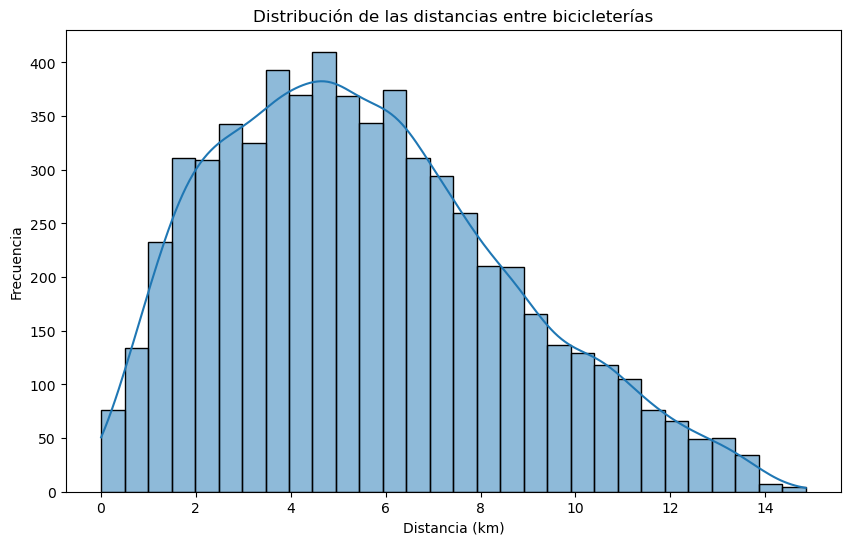

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True)
plt.title('Distribución de las distancias entre bicicleterías')
plt.xlabel('Distancia (km)')
plt.ylabel('Frecuencia')
plt.show()

## Mapa de ubicación de las bicicleterías

In [16]:
# Crear un mapa centrado en las coordenadas medias de todas las bicicleterías
average_latitude = df['latitude'].mean()
average_longitude = df['longitude'].mean()
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Añadir marcadores para cada bicicletería
for _, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
                  popup=row['nombre']).add_to(m)

# Guardar el mapa como un archivo HTML
m.save("mapa_bicicleterias.html")
print("El mapa de las bicicleterías ha sido guardado como 'mapa_bicicleterias.html'.")

El mapa de las bicicleterías ha sido guardado como 'mapa_bicicleterias.html'.


## Agrupación por comuna

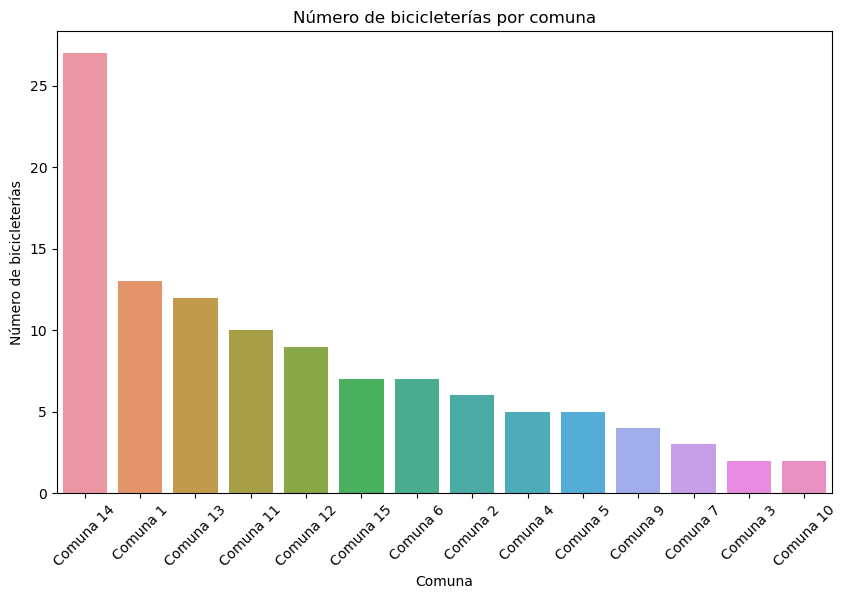

In [17]:
comuna_counts = df['comuna'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=comuna_counts.index, y=comuna_counts.values)
plt.title('Número de bicicleterías por comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de bicicleterías')
plt.xticks(rotation=45)
plt.show()

## Análisis de la disponibilidad de servicio de mecánica

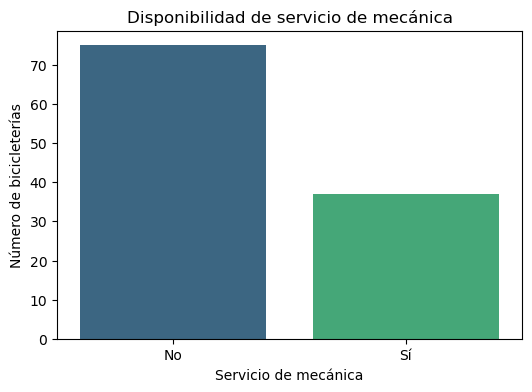

In [18]:
mecanica_counts = df['mecanica_s'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=mecanica_counts.index, y=mecanica_counts.values, palette='viridis')
plt.title('Disponibilidad de servicio de mecánica')
plt.xlabel('Servicio de mecánica')
plt.ylabel('Número de bicicleterías')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

## Análisis de horarios de operación

In [19]:
# Exploramos los horarios de operación y buscamos patrones comunes
horarios = df['horario_de'].dropna()
horarios_list = horarios.apply(lambda x: x.lower()).tolist()
# Mostrar los primeros 10 horarios como ejemplo
print("Ejemplos de horarios de operación:")
for i in range(min(10, len(horarios_list))):
    print(f"- {horarios_list[i]}")

# Analizar cuántas bicicleterías operan en ciertos rangos de tiempo (e.g., solo mañanas, solo tardes, todo el día)
# Aquí solo mostramos algunos ejemplos de patrones comunes
morning_count = sum(1 for h in horarios_list if 'mañana' in h)
afternoon_count = sum(1 for h in horarios_list if 'tarde' in h)
all_day_count = sum(1 for h in horarios_list if 'todo el día' in h)

print("\nAnálisis de horarios de operación:")
print(f"- Bicicleterías que operan solo en la mañana: {morning_count}")
print(f"- Bicicleterías que operan solo en la tarde: {afternoon_count}")
print(f"- Bicicleterías que operan todo el día: {all_day_count}")

Ejemplos de horarios de operación:
- lunes a viernes de 10 a 20 hs y sábados de 10 a 18hs.
- lun a vier de 10 a 13 y de 14.30 a 19 / sáb de 10 a 13
- lun a vier de 9 a 19/sáb de 9 a 13
- lun a vier de 9.30 a 13.30 y de 15.30 a 19.30/sáb de 9 a 13 y 15 a 18
- lun a vier de 9 a 18.30
- lun a vier de 9 a 13 y de 15 a 19.30/sáb de 9 a 13.30 y de 15 a 18
- lun a vier de 10 a 13.30 y de 15 a 19.45/sáb de 10 a 14 y de 15 a 18
- lun a vier de 9.30 a 20/sáb de 9.30 a 17
- lun a vier 9 a 19
- lun a sáb de 9 a 20

Análisis de horarios de operación:
- Bicicleterías que operan solo en la mañana: 0
- Bicicleterías que operan solo en la tarde: 0
- Bicicleterías que operan todo el día: 0


## Análisis por barrio

In [21]:
df['barrio'].value_counts()

barrio
Palermo              27
Caballito             7
Recoleta              6
Belgrano              6
Villa Urquiza         5
Villa Crespo          4
Nuñez                 4
Villa Del Parque      4
Retiro                4
Almagro               4
San Nicolas           3
Constitucion          3
Villa Gral. Mitre     3
Villa Santa Rita      2
Chacarita             2
Mataderos             2
Villa Pueyrredon      2
Flores                2
Colegiales            2
Monserrat             2
Barracas              2
Parque Avellaneda     1
Balvanera             1
Villa Ortuzar         1
Villa Devoto          1
Boedo                 1
Monte Castro          1
Liniers               1
San Cristobal         1
Velez Sarsfield       1
San Telmo             1
Saavedra              1
Parque Chacabuco      1
Boca                  1
Parque Patricios      1
Nueva Pompeya         1
Coghlan               1
Name: count, dtype: int64

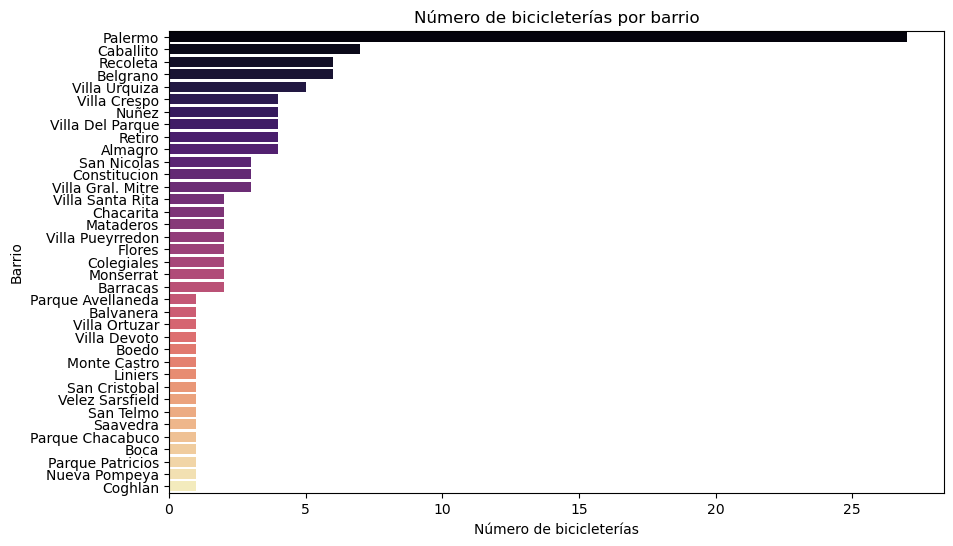

In [22]:
barrio_counts = df['barrio'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=barrio_counts.index, x=barrio_counts.values, palette='magma')
plt.title('Número de bicicleterías por barrio')
plt.xlabel('Número de bicicleterías')
plt.ylabel('Barrio')
plt.show()

## Análisis de correlación entre la cantidad de bicicleterías y servicios de mecánica

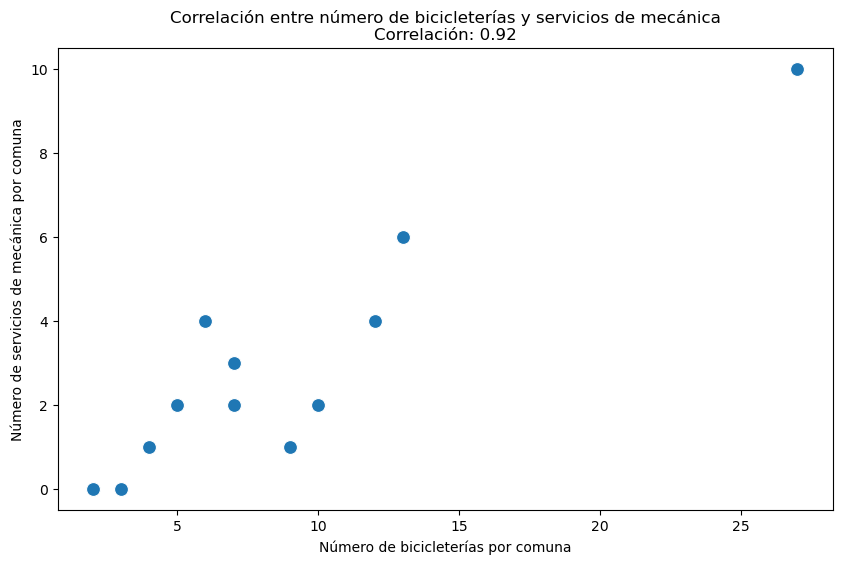

In [25]:
# Agrupar por comuna y contar los servicios de mecánica
comuna_mecanica = df.groupby('comuna')['mecanica_s'].sum()
comuna_total = df['comuna'].value_counts()
correlation = comuna_mecanica.corr(comuna_total)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comuna_total, y=comuna_mecanica, s=100)
plt.title(f'Correlación entre número de bicicleterías y servicios de mecánica\nCorrelación: {correlation:.2f}')
plt.xlabel('Número de bicicleterías por comuna')
plt.ylabel('Número de servicios de mecánica por comuna')
plt.show()

## Análisis de densidad geográfica

In [26]:
# Usamos Folium para visualizar la densidad
m = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Añadimos un heatmap para mostrar densidad
from folium.plugins import HeatMap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Guardar el mapa de densidad como un archivo HTML
m.save("mapa_densidad_bicicleterias.html")
print("El mapa de densidad de las bicicleterías ha sido guardado como 'mapa_densidad_bicicleterias.html'.")

El mapa de densidad de las bicicleterías ha sido guardado como 'mapa_densidad_bicicleterias.html'.


## Análisis de palabras clave en nombres de bicicleterías

In [27]:
from collections import Counter
import re

# Extraer nombres y dividirlos en palabras
nombres = df['nombre'].dropna().tolist()
palabras = [palabra.lower() for nombre in nombres for palabra in re.findall(r'\b\w+\b', nombre)]

# Contar frecuencia de palabras
contador_palabras = Counter(palabras)
palabras_comunes = contador_palabras.most_common(10)

# Mostrar las palabras más comunes en los nombres de las bicicleterías
print("Palabras más comunes en los nombres de las bicicleterías:")
for palabra, frecuencia in palabras_comunes:
    print(f"- {palabra}: {frecuencia} veces")

Palabras más comunes en los nombres de las bicicleterías:
- bike: 18 veces
- bikes: 18 veces
- rodados: 14 veces
- bicicletería: 7 veces
- bicicleterias: 4 veces
- canaglia: 4 veces
- bicicletas: 3 veces
- bici: 3 veces
- shop: 3 veces
- la: 3 veces


## Análisis de los datos de contacto y presencia en la web

In [29]:
df['has_phone'] = df['telefono'].notna()
df['has_email'] = df['email'].notna()
df['has_web'] = df['web'].notna()

# Calcular porcentajes de bicicleterías con cada tipo de contacto
porcentaje_telefono = df['has_phone'].mean() * 100
porcentaje_email = df['has_email'].mean() * 100
porcentaje_web = df['has_web'].mean() * 100

print("\nPorcentaje de bicicleterías con datos de contacto:")
print(f"- Teléfono: {porcentaje_telefono:.2f}%")
print(f"- Email: {porcentaje_email:.2f}%")
print(f"- Página web: {porcentaje_web:.2f}%")


Porcentaje de bicicleterías con datos de contacto:
- Teléfono: 98.21%
- Email: 93.75%
- Página web: 76.79%


## Agrupación de bicicleterías por barrios y análisis de servicios ofrecidos


Barrios con más servicios de mecánica:
barrio
Palermo        10
Recoleta        4
San Nicolas     3
Caballito       2
Retiro          2
Chacarita       2
Almagro         2
Belgrano        2
Boca            1
Nuñez           1
Name: mecanica_s, dtype: int64


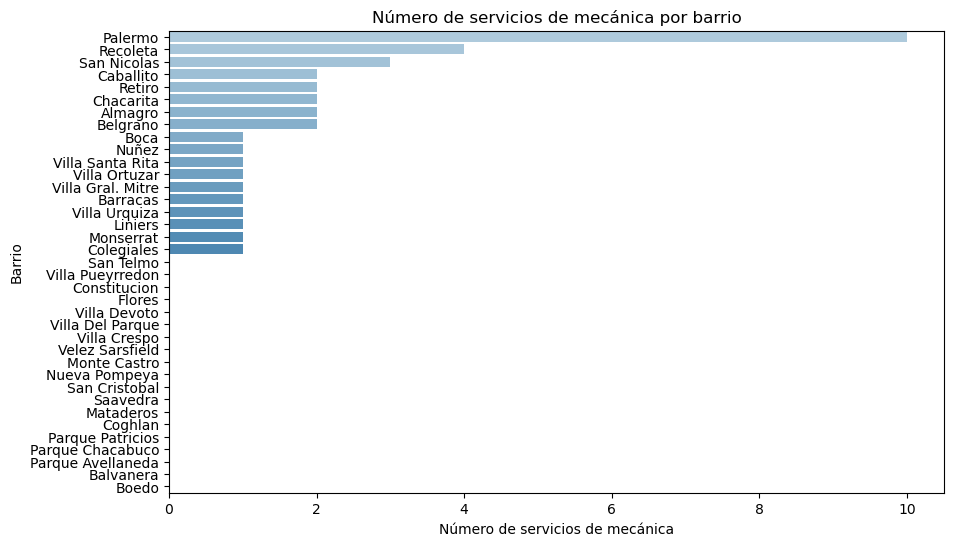

In [30]:
barrio_mecanica = df.groupby('barrio')['mecanica_s'].sum().sort_values(ascending=False)

# Mostrar barrios con más servicios de mecánica
print("\nBarrios con más servicios de mecánica:")
print(barrio_mecanica.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(y=barrio_mecanica.index, x=barrio_mecanica.values, palette='Blues_d')
plt.title('Número de servicios de mecánica por barrio')
plt.xlabel('Número de servicios de mecánica')
plt.ylabel('Barrio')
plt.show()